In [1]:
# use the anomaly detection algorithm to detect failing servers on a nets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.covariance import EllipticEnvelope

In [2]:
ex8data1 = pd.read_csv('ex8data1.csv', header = None)
ex8data1_cs = pd.read_csv('ex8data1_cs.csv', header=None)

print(ex8data1.describe())
X = ex8data1.as_matrix()
Xval = ex8data1_cs.as_matrix([0,1])
yval = ex8data1_cs[2]
yval = [ 1 - 2*y for y in yval]

                0           1
count  307.000000  307.000000
mean    14.112226   14.997711
std      1.355957    1.309707
min      4.752613    4.126232
25%     13.403351   14.361997
50%     14.059507   15.023113
75%     14.675503   15.654394
max     23.339868   24.350407


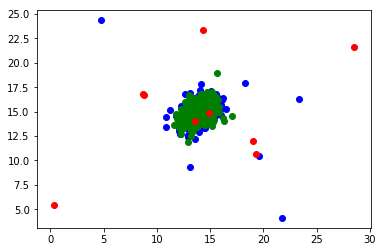

In [3]:
def plot(X, color= "r"):
    plt.scatter(X[:,0],X[:,1], color=color, marker='o')
    
plot(X, 'b')
Xpos = ex8data1_cs[ex8data1_cs[2] == 0].as_matrix([0,1])
plot(Xpos,'g')
Xneg = ex8data1_cs[ex8data1_cs[2] == 1].as_matrix([0,1])
plot(Xneg, 'r')

    

In [6]:
anomal_detection = EllipticEnvelope()
clf = anomal_detection.fit(X)


print(clf.score(Xval,yval))

0.9087947882736156


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


when the proportion of outliers is 0.1 , the score of cross valid data is 0.9087947882736156


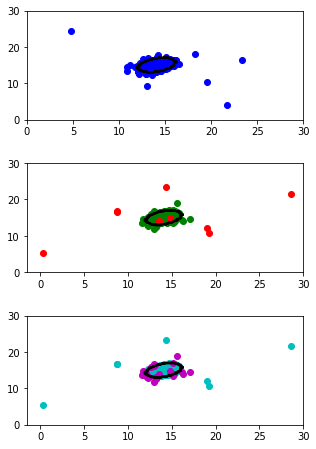

In [7]:
def visualize_anomaly_result(proportion_of_outliers = [0.1]):
    xx, yy = np.meshgrid(np.linspace(0, 30, 150),
                         np.linspace(0, 30, 150))

    plt.figure(figsize=(4*len(proportion_of_outliers),6))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.2,
                        hspace=.4)

    for i, prob_outlier in enumerate(proportion_of_outliers):
        anomal_detection = EllipticEnvelope(contamination = prob_outlier)
        clf = anomal_detection.fit(X)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.subplot(3, len(proportion_of_outliers), i+1 )
        plt.contour(xx, yy, Z, linewidths=2, colors='black')
        plot(X,'b')

        plt.subplot(3, len(proportion_of_outliers), i+1+len(proportion_of_outliers))
        plt.contour(xx, yy, Z, linewidths=2, colors='black')
        plot(Xpos,'g')
        plot(Xneg,'r')

        ypredict = clf.predict(Xval)
        Xpre_correct = ex8data1_cs[ypredict == yval].as_matrix([0,1])
        Xpre_wrong = ex8data1_cs[ypredict != yval].as_matrix([0,1])

        plt.subplot(3, len(proportion_of_outliers), i+1+2*len(proportion_of_outliers))
        plt.contour(xx, yy, Z, linewidths=2, colors='black')
        plot(Xpre_correct,'c')
        plot(Xpre_wrong, 'm')

        print("when the proportion of outliers is", prob_outlier, ", the score of cross valid data is", clf.score(Xval, yval))

    
visualize_anomaly_result()


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


when the proportion of outliers is 0.1 , the score of cross valid data is 0.9087947882736156
when the proportion of outliers is 0.05 , the score of cross valid data is 0.9641693811074918
when the proportion of outliers is 0.02 , the score of cross valid data is 0.9869706840390879
when the proportion of outliers is 0.01 , the score of cross valid data is 0.9804560260586319


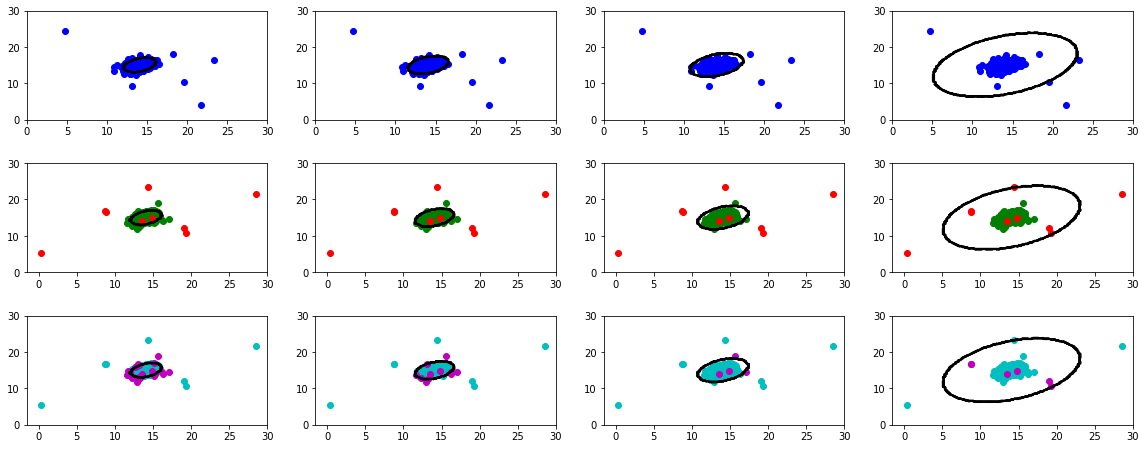

In [8]:
proportion_of_outliers = [0.1, 0.05, 0.02, 0.01]
visualize_anomaly_result(proportion_of_outliers)

In [36]:
ex8data2 = pd.read_csv('ex8data2.csv', header=None)
ex8data2_cs = pd.read_csv('ex8data2_cs.csv', header=None)
X = ex8data2.as_matrix()

Xval = ex8data2_cs.as_matrix(np.arange(0,11))
yval = ex8data2_cs[11]
yval = [ 1 - 2*y for y in yval]

anomaly_detection = EllipticEnvelope(contamination = 0.01)
clf = anomaly_detection.fit(X)
ypredict = clf.predict(Xval)
print(sum(yval == ypredict))
print(clf.score(Xval, yval))

sum(clf.predict(X)==1)


95
0.95


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


990